# House Price Prediction : Kaggle

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

### Data fields
Here's a brief version of what you'll find in the data description file.

1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement


BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder # Col Normalization
from sklearn.decomposition import PCA # Reducing the Dimensions and Finding the Optimal Components
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor # Ensemble
from sklearn.tree import DecisionTreeRegressor # Decision Tree
from sklearn.linear_model import LinearRegression # Linear Regression

In [261]:
# import the train and test dataset
train = pd.read_csv("C://Users//Administrator//Downloads//Unsupervised ML - Mukul Chauhan//train.csv")
test = pd.read_csv("C://Users//Administrator//Downloads//Unsupervised ML - Mukul Chauhan//test.csv")

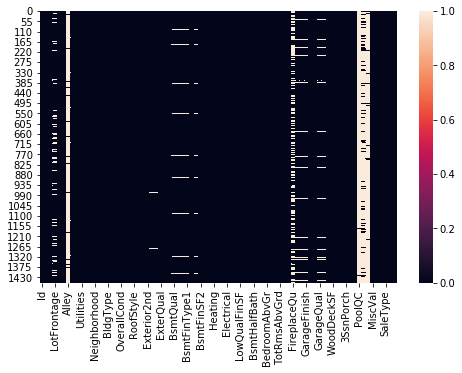

In [9]:
# Visualize the Missing Values
plt.figure(figsize=[8,5])
sns.heatmap(train.isnull())

### Finding on Missing Values

The columns that have missing values are Lot Frontage, Pool QC, Fireplace QC, Alley, Basement FinType 01

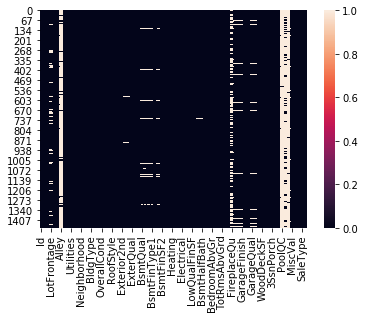

In [11]:
# Test Data Missing Values
sns.heatmap(test.isnull())

In [12]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Find if the categorical variables have "?" or not.Generally Cat Variables have the "?" as missing values and hence we should find if any of the variable has missing values in form of Q Mark


In [17]:
sum(train.MSZoning=="@")

0

In [31]:
# Finding if the cols have QMark
cols = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [32]:
for i in cols:
    if np.dtype(train[i]).name=="object":
        print(i, ":", sum(train[i]=="?"))

MSZoning : 0
Street : 0
Alley : 0
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 0
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 0
BsmtCond : 0
BsmtExposure : 0
BsmtFinType1 : 0
BsmtFinType2 : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 0
KitchenQual : 0
Functional : 0
FireplaceQu : 0
GarageType : 0
GarageFinish : 0
GarageQual : 0
GarageCond : 0
PavedDrive : 0
PoolQC : 0
Fence : 0
MiscFeature : 0
SaleType : 0
SaleCondition : 0


# Remove Missing values

In [79]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [36]:
train.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [60]:
print(train.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt         0
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [81]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [82]:
train.shape

(1460, 81)

In [46]:
train.Fence.value_counts() # Keep Fence and Impute MnPrv

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [55]:
train[train.Alley=="Pave"]["SalePrice"].describe()

count        41.000000
mean     168000.585366
std       38370.375243
min       40000.000000
25%      151000.000000
50%      172500.000000
75%      185000.000000
max      265979.000000
Name: SalePrice, dtype: float64

In [50]:
train[train.Fence=="GdPrv"]["SalePrice"].describe()

count        59.000000
mean     178927.457627
std       56757.237563
min      108000.000000
25%      144950.000000
50%      167500.000000
75%      189475.000000
max      475000.000000
Name: SalePrice, dtype: float64

In [115]:
# Imputing the Missing Values with Median | Numerical Columns
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)

In [116]:
train_copy = train # making back up

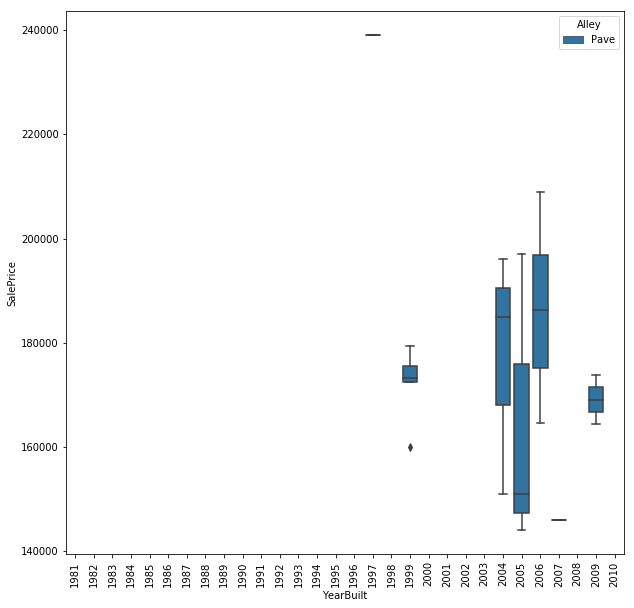

In [84]:
# Alley
plt.figure(figsize=[10,10])
sns.boxplot(x = "YearBuilt", y = "SalePrice", data = train[train.YearBuilt>1980], 
           hue = "Alley")
plt.xticks(rotation=90)
plt.show()

In [90]:
# Imputting Alley as Pave
train_copy = train
train[train.YearBuilt>1999].loc[:, "Alley"] = train["Alley"].fillna("Pave")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [112]:
train = train_copy
#train.Alley.value_counts()

In [93]:
cndtn = train[train.YearBuilt>1999].loc[:, "Alley"]

In [121]:
train.loc[train.YearBuilt<=1999, "Alley"] = train.loc[train.YearBuilt<=1999, "Alley"].fillna("Grvl")

In [130]:
test.Alley.value_counts()

Pave    1389
Grvl      70
Name: Alley, dtype: int64

In [119]:
train.loc[train.YearBuilt>1999, "Alley"] = train.loc[train.YearBuilt>1999, "Alley"].fillna("Pave")

In [129]:
test.loc[test.YearBuilt>1999, "Alley"] = test.loc[test.YearBuilt>1999, "Alley"].fillna("Pave")
test.loc[test.YearBuilt<=1999, "Alley"] = test.loc[test.YearBuilt<=1999, "Alley"].fillna("Grvl")

In [132]:
#train.isnull().sum() 

# FireplaceQu, GarageType, Garage Finish, GarageQual, GarageCond

In [145]:
train.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [135]:
# Impute gd in train.fireplaceqc
train.FireplaceQu.fillna("Gd", inplace=True)
test.FireplaceQu.fillna("Gd", inplace=True)

In [139]:
# Impute Attchd in train.garagetype
train.GarageType.fillna("Attchd", inplace=True)
test.GarageType.fillna("Attchd", inplace=True)

In [142]:
# Impute Attchd in train.garagefinish
train.GarageFinish.fillna("Unf", inplace=True)
test.GarageFinish.fillna("Unf", inplace=True)

In [144]:
# Impute Attchd in train.garageQual
train.GarageQual.fillna("TA", inplace=True)
test.GarageQual.fillna("TA", inplace=True)

In [146]:
# Impute Attchd in train.garageQual
train.GarageCond.fillna("TA", inplace=True)
test.GarageCond.fillna("TA", inplace=True)

In [179]:
sum(newtrain.isnull().sum())

0

In [149]:
newtrain = train.drop(["Id","PoolQC", "Fence", "MiscFeature"], axis = 1)

In [150]:
newtest = test.drop(["Id","PoolQC", "Fence", "MiscFeature"], axis = 1)

In [157]:
print(newtrain.shape)
print(newtest.shape)

(1460, 77)
(1459, 76)


In [177]:
newtrain.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [156]:
# Impute Attchd in newtrain.garageQual
newtrain.BsmtQual.fillna("TA", inplace=True)
newtest.BsmtQual.fillna("TA", inplace=True)

In [161]:
# Impute Attchd in newtrain.garageQual
newtrain.MasVnrType.fillna("None", inplace=True)
newtest.MasVnrType.fillna("None", inplace=True)

In [168]:
# Impute Attchd in newtrain.Bsmt
newtrain.BsmtFinType1.fillna("Unf", inplace=True)
newtest.BsmtFinType1.fillna("Unf", inplace=True)

In [169]:
newtrain.BsmtFinType2.fillna("Unf", inplace=True)
newtest.BsmtFinType2.fillna("Unf", inplace=True)

In [171]:
newtrain.Electrical.fillna("SBrkr", inplace=True)
newtest.Electrical.fillna("SBrkr", inplace=True)

In [173]:
newtrain.BsmtCond.fillna("TA", inplace=True)
newtest.BsmtCond.fillna("TA", inplace=True)

In [178]:
newtrain.BsmtExposure.fillna("No", inplace=True)
newtest.BsmtExposure.fillna("No", inplace=True)

In [213]:
sum(newtest.isnull().sum())

0

In [186]:
newtest.fillna(newtest.median(), inplace=True)

In [209]:
newtest.isnull().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [ ]:
newtest.MSZoning.value_counts()

In [212]:
newtest.MSZoning.fillna("RL", inplace=True)

### Apply Standard Scaling and PCA

In [214]:
# Apply Standard Scaling
sc = StandardScaler()

In [215]:
# Applying OHE
newtrain_dummy = pd.get_dummies(newtrain)
newtest_dummy = pd.get_dummies(newtest)

In [216]:
print(newtrain_dummy.shape)
print(newtest_dummy.shape)

(1460, 278)
(1459, 261)


In [217]:
# Scaling the Dataset
scaledtrain = sc.fit_transform(newtrain_dummy)
scaledtest = sc.fit_transform(newtest_dummy)

In [219]:
scaledtrain_df = pd.DataFrame(scaledtrain, columns=newtrain_dummy.columns)

In [220]:
scaledtest_df = pd.DataFrame(scaledtest, columns=newtest_dummy.columns)

In [221]:
scaledtest_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


In [224]:
# Define the Y values
#xtrain = scaledtrain_df.drop("SalePrice", axis = 1)
y = scaledtrain_df.SalePrice

In [242]:
pc = PCA(n_components=120)

In [243]:
pca_train = pd.DataFrame(pc.fit_transform(scaledtrain_df))
pca_test = pd.DataFrame(pc.fit_transform(scaledtest_df))

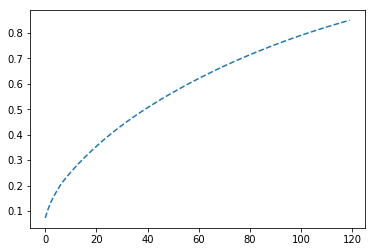

In [244]:
plt.plot(np.cumsum(pc.explained_variance_ratio_), linestyle = "dashed", 
         markerfacecolor = "red", markersize = 10)

In [245]:
# Apply Linear Regression
lr = LinearRegression()

In [246]:
lr.fit(pca_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [248]:
lr_model = lr.predict(pca_test)

In [258]:
scaled = sc.fit_transform(pd.DataFrame(train.SalePrice))

In [264]:
actual_values  = sc.inverse_transform(lr_model)

In [265]:
# Prepare the Data frame for Submission
Id = test.Id
SalePrice = actual_values

In [268]:
solution = pd.DataFrame({"Id":Id, "SalePrice":SalePrice})

In [269]:
solution.to_csv("LR Model.csv", index = False) # RMSE 0.31682

In [271]:
dtree = DecisionTreeRegressor()

In [272]:
dtree.fit(pca_train, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [273]:
model_tree = dtree.predict(pca_test)

In [274]:
# Prepare the Data frame for Submission
actual_values  = sc.inverse_transform(model_tree)
Id = test.Id
SalePrice = actual_values

In [276]:
solution = pd.DataFrame({"Id":Id, "SalePrice":SalePrice})
solution.to_csv("Tree Model.csv", index = False) # RMSE 0.26446

In [278]:
rf = RandomForestRegressor()
rf.fit(pca_train, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [279]:
model_rf = rf.predict(pca_test)

In [280]:
# Prepare the Data frame for Submission
actual_values  = sc.inverse_transform(model_rf)
Id = test.Id
SalePrice = actual_values

In [281]:
solution = pd.DataFrame({"Id":Id, "SalePrice":SalePrice})
solution.to_csv("RF Model.csv", index = False) # RMSE 0.21080

In [282]:
bagg = BaggingRegressor()

In [283]:
bagg.fit(pca_train, y)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [284]:
model_bagg = bagg.predict(pca_test)

In [285]:
# Prepare the Data frame for Submission
actual_values  = sc.inverse_transform(model_bagg)
Id = test.Id
SalePrice = actual_values

In [286]:
solution = pd.DataFrame({"Id":Id, "SalePrice":SalePrice})
solution.to_csv("Bagging Model.csv", index = False) # RMSE 0.20331

In [287]:
# Boosting Model
ada = AdaBoostRegressor()

In [288]:
ada.fit(pca_train, y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [289]:
model_ada = ada.predict(pca_test)

In [290]:
# Prepare the Data frame for Submission
actual_values  = sc.inverse_transform(model_ada)
Id = test.Id
SalePrice = actual_values

In [291]:
solution = pd.DataFrame({"Id":Id, "SalePrice":SalePrice})
solution.to_csv("Adaboost Model.csv", index = False) # RMSE 0.20331

In [304]:
# Ensemble of base Models
ensemble_models = (model_bagg+
                   model_rf+model_tree+lr_model)/4

In [305]:
ensemble_models

array([-0.79256878,  0.01079412, -0.20498297, ...,  0.03090633,
       -0.73202939,  0.47893948])

In [306]:
# Prepare the Data frame for Submission
actual_values  = sc.inverse_transform(ensemble_models)
Id = test.Id
SalePrice = actual_values

In [307]:
solution = pd.DataFrame({"Id":Id, "SalePrice":SalePrice})
solution.to_csv("Ensemble Model.csv", index = False) # RMSE 0.20331